# Data Set Visualization Preview
The dataset was sourced from the UCI Machine Learning Repository where it was donated on August 26, 2019. The dataset is an analysis of potential obesity levels of individauls based on variables such as physical exersice, diet history, and age. The data contains 17 total attributes with no missing values. It should be stated that about 77% of the data was artificial generated while the remianing 23% was collected from surveys online.

# Database Used

In [14]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Read the CSV file
data = pd.read_csv('obesity.csv')

# Display the first 10 rows
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


# Data Variable Description
1. Gender               = Male or Female
3. Age				     
4. Height			    = Cenimeters or Meters
5. Weight				= Kilograms
6. Family history		= Has a family member suffered or suffers from overweight?
7. FAVC				    = Do you eat high caloric food frequently?
8. FCVC				    = Do you usually eat vegetables in your meals?
9. NCP				    = How many main meals do you have daily?
10. CAEC			    = Do you eat any food between meals?
11. SMOKE				= Do you smoke?
12. CH20				= How much water do you drink daily?
13. SCC				    =  Do you monitor the calories you eat daily?
14. FAF				    = How often do you have physical activity?
15. TUE				    = How much time do you use technological devices such as cell phone, videogames, television, computer and others?
16. CALC				= How often do you drink alcohol?
17. MTRANS				= Which transportation do you usually use?
18. NObeyesdad			= Obesity Level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III)

# Visualization #1: 3D Scatter Plot

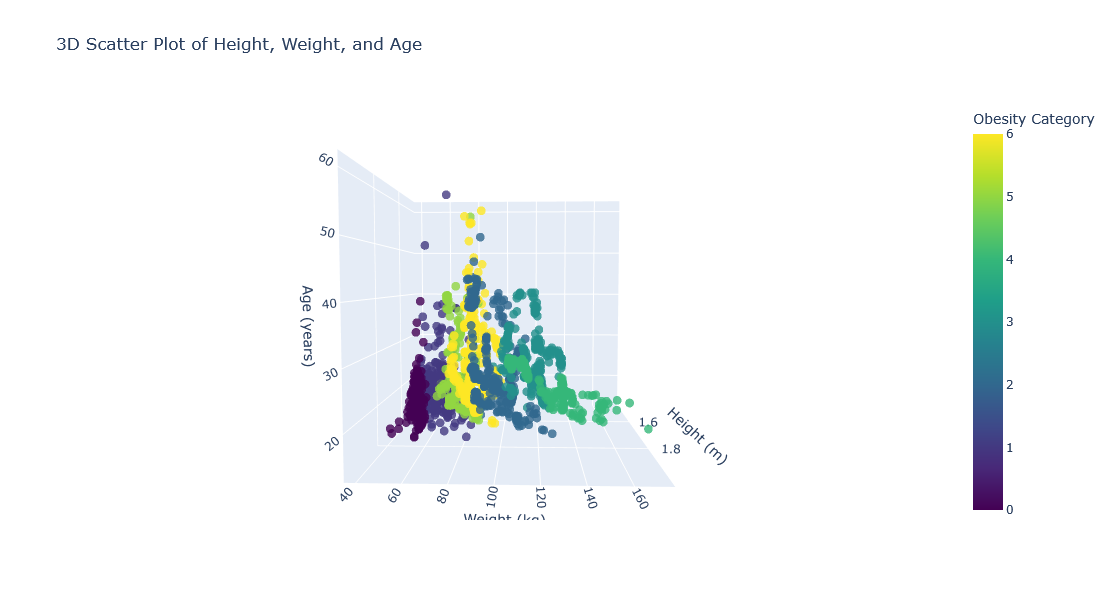

In [201]:
# Create an interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=data['Height'],       # X-axis: Height in meters
    y=data['Weight'],       # Y-axis: Weight in kilograms
    z=data['Age'],          # Z-axis: Age in years
    mode='markers',         # Display as markers (points)
    marker=dict(
        size=5,             
        color=data['NObeyesdad'].astype('category').cat.codes,  # Color by obesity category
        colorscale='Viridis',    # Color palette
        opacity=0.8,        
        colorbar=dict(title='Obesity Category')  # Add colorbar legend
    ),
    text=[
        f"Age: {age}<br>Height: {height}m<br>Weight: {weight}kg" 
        for age, height, weight in zip(data['Age'], data['Height'], data['Weight'])
    ], 
    hoverinfo='text'   # Display custom text 
)])

# Update layout for better visualization
fig.update_layout(
    title='3D Scatter Plot of Height, Weight, and Age',
    scene=dict(
        xaxis_title='Height (m)',
        yaxis_title='Weight (kg)',
        zaxis_title='Age (years)'
    ),
    width=800,              # Figure width in pixels
    height=600              # Figure height in pixels
)

# Save Visualization
plt.savefig("Jamie_3DScatterPlotHeightWeightAge.png")

# Display the interactive plot
fig.show()                  

## Purpose and Insight 
The purpose of this 3D scatter plot is to explore the relationship between age, weight, height, and obesity risk. This visualization focuses on the question of "Does age affect the risk of obesity independently of height and weight?" From the visualization we can see that there is an group of taller and larger individuals who despite their large weight are not considered obese. These can either be data anomalies or individuals with high muscle mass.
We can also see that obesity levels (I to III) are appearing consistently between the age of 20 to 40. The big takeway from this visualization is that obesity risk prodominately affect the ages between 20 to 40 for those who weight 60 to 90kg. 

# Visualization #2: Wireframe Plot

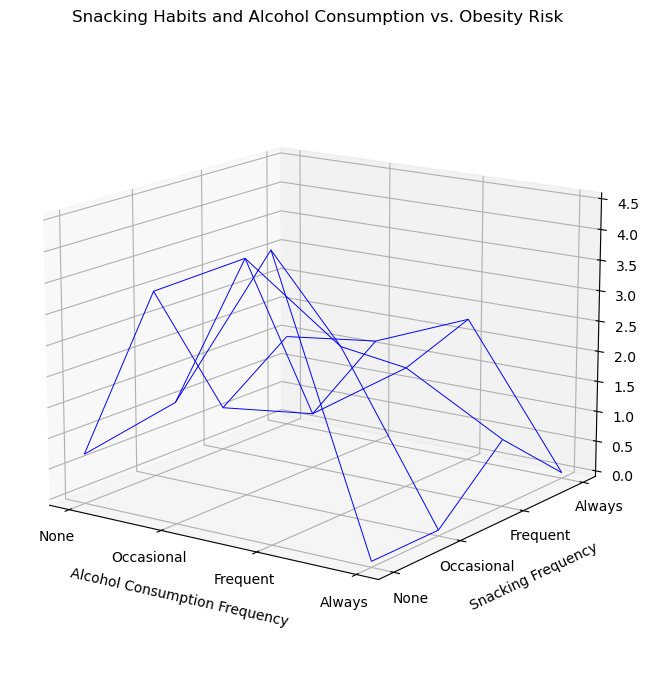

In [13]:
# Encode categorical variables numerically
caec_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
obesity_levels = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

data['CAEC_encoded'] = data['CAEC'].map(caec_mapping)
data['CALC_encoded'] = data['CALC'].map(calc_mapping)
data['Obesity_encoded'] = data['NObeyesdad'].map(obesity_levels)

# Create pivot table for 3D data
pivot_table = data.pivot_table(
    values='Obesity_encoded',
    index='CAEC_encoded',
    columns='CALC_encoded',
    aggfunc='mean',
    fill_value=0
)

# Generate grid coordinates
X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
Z = pivot_table.values

# Create 3D wireframe plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color='blue', linewidth=0.7)

# Labels
ax.set_xlabel('\nAlcohol Consumption Frequency', linespacing=2)
ax.set_ylabel('\nSnacking Frequency', linespacing=2)
ax.set_zlabel('\nAverage Obesity Severity', linespacing=2)

# Ticks/Labels
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['None', 'Occasional', 'Frequent', 'Always'])
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['None', 'Occasional', 'Frequent', 'Always'])

# Add perspective
ax.view_init(elev=15, azim=-55)

# Title
ax.set_title('Snacking Habits and Alcohol Consumption vs. Obesity Risk', pad=20)

# Save Visualization
plt.savefig("Jamie_3DWireframeObesityRiskbySnackingandAlcohol.png")
plt.show()

## Purpose and Insight
The purpose of the 3D wireframe plot is to explore how the frequency of alcohol consumption and the frequency of snacking has an impact on obesity risk. From this visualization we can see the largest peak when alcohol consumption is frequent and snacking frequency is low (between none and occasional). 
From this visualization we can also see a rounded peak when alcohol consumption is frequent and snacking frequency is high (between frequent and always). It is important to notice the uniform peak that occurs when alcohol consumption is rather low (between none and occasional) and snacking frequency is between none and frequent. We would expect to see obesity risk peaking when snacking frequency and alcohol is at its highest (between frequent and always). However, there is a chance that the individuals who snack a lot are participating in an increased amount of physical exercise and their method of transportation is walking. The big takeaway from this visualization is that when alcohol consumption is occasional or frequent, obesity risk is greater despite snacing freuqency being low.

# Visualization #3: Scatter Plot

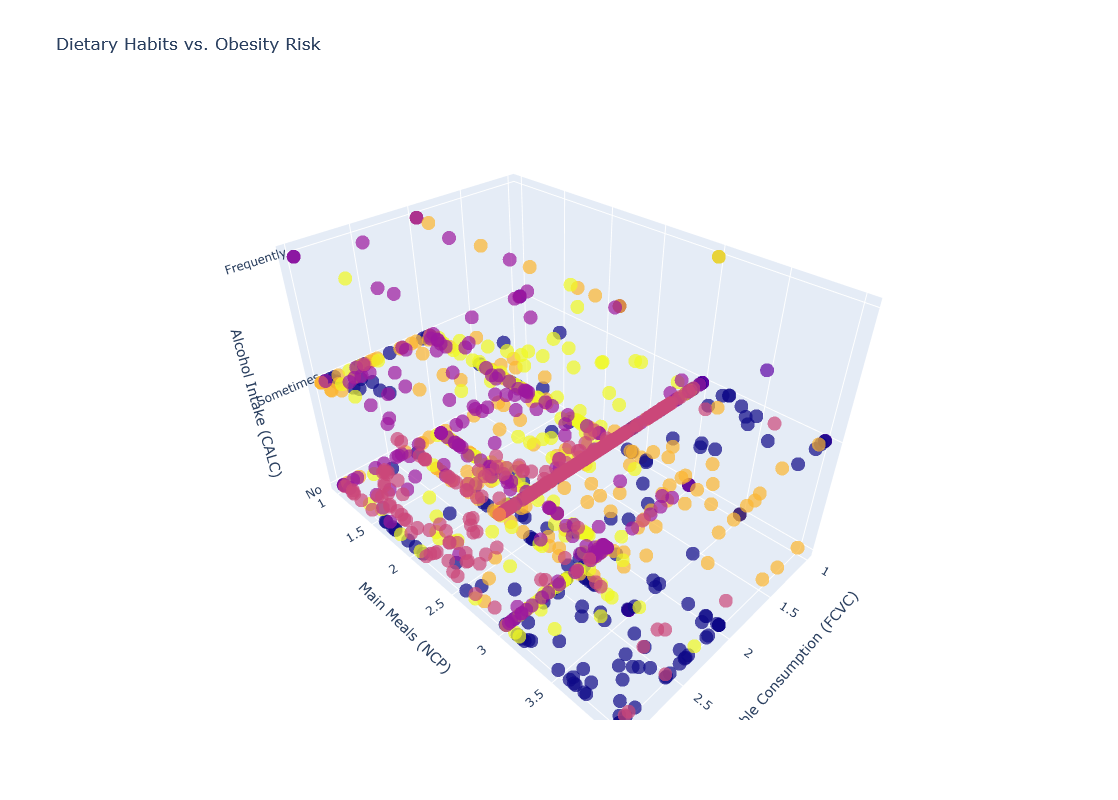

In [31]:
# Map CALC (alcohol) to numeric values for Z-axis
calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2}
data['CALC_numeric'] = data['CALC'].map(calc_mapping)

# Create an interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=data['FCVC'],           # X-axis: Vegetable consumption
    y=data['NCP'],            # Y-axis: Number of main meals
    z=data['CALC_numeric'],   # Z-axis: Alcohol consumption
    mode='markers',           # Display as markers
    marker=dict(
        size=8,
        color=data['NObeyesdad'].astype('category').cat.codes,
        colorscale='plasma',
        opacity=0.7
    ),
    text=[
        f"Vegetable Consumption: {fcvc}<br>Main Meals: {ncp}<br>"
        f"Alcohol Intake: {calc}<br>Obesity Level: {obesity}"
        for fcvc, ncp, calc, obesity in zip(
            data['FCVC'],
            data['NCP'],
            data['CALC'],
            data['NObeyesdad']
        )
    ],
    hoverinfo='text'
)])

# Update layout
fig.update_layout(
    title='Dietary Habits vs. Obesity Risk',
    scene=dict(
        xaxis_title='Vegetable Consumption (FCVC)',
        yaxis_title='Main Meals (NCP)',
        zaxis_title='Alcohol Intake (CALC)',
        zaxis=dict(
            tickvals=[0, 1, 2],
            ticktext=['No', 'Sometimes', 'Frequently']
        )
    ),
    width=1000,
    height=800,
    legend_title_text='Obesity Level'
)

# Save Visualization
plt.savefig("Jamie_DietaryHabitsVSObesityRisk.png")
fig.show()

## Purpose and Insight
The purpose of the 3D scatter plot is to explore how an individuals dietary habits (meals consumed, alcohol intake, and vegetables consumed) have an impact on obesity risk. From this visualization we can see a larger cluster of individuals with increased obesity risk have a large quanitiy of vegetables consumed as well as the average meals eaten being between 1 and 3. From this visualization we can also see that individuals with insufficient weight or low obesity risk are often eating between 3 to 4 meals and consuming the largest amount of vegetables. It should be stated that there are less than 35 data points that frequently drank alcohol had a high obesity risk score. From this visualization we would expect an overlap between high alcohol consumption, low vegetable consumption, and high quantity of meals to have the highest cluster of data points with a high obesity risk but the data shows otherwise.The big takeaway from this visualization is that poor dietary habits (small vegetable intake, alcohol use, and less meals eaten) show an increase in obesity risk.

# Visualization #4: Interpolated Surface Plot

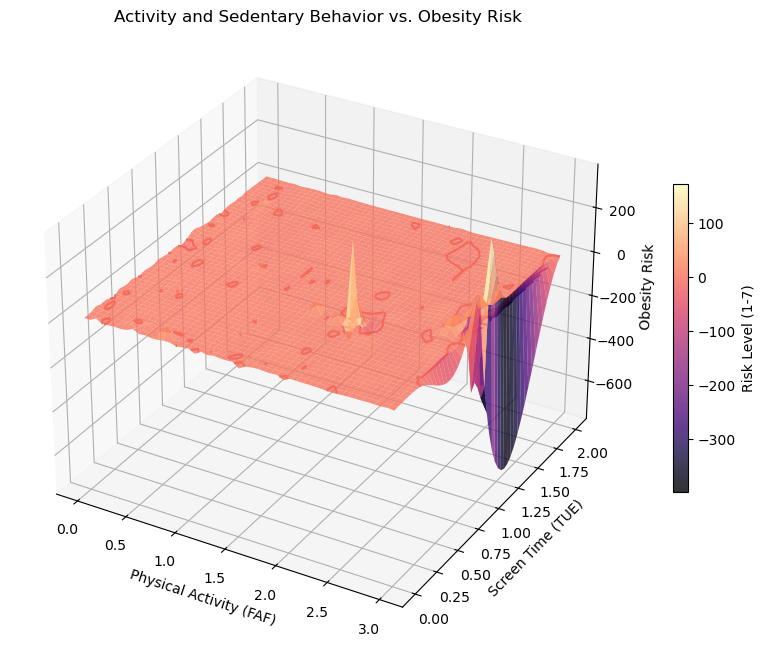

In [15]:
# Ensures a smooth surface for the scattered points
from scipy.interpolate import griddata

# Calculate obesity risk scores (ordinal encoding)
obesity_risk = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}
data['Obesity_Risk'] = data['NObeyesdad'].map(obesity_risk)

# Create grid for surface plot
xi = np.linspace(data['FAF'].min(), data['FAF'].max(), 50)
yi = np.linspace(data['TUE'].min(), data['TUE'].max(), 50)
xi, yi = np.meshgrid(xi, yi)

# Interpolate obesity risk values (takes the scattered points and creates a smooth transition)
zi = griddata(
    (data['FAF'], data['TUE']),  
    data['Obesity_Risk'],
    (xi, yi),
    method='cubic'
)

# Plot surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='magma', edgecolor='none', alpha=0.8)
ax.contour(xi, yi, zi, zdir='z', offset=1, cmap='magma')  # Add contour

# Title and Labels
ax.set_xlabel('Physical Activity (FAF)')
ax.set_ylabel('Screen Time (TUE)')
ax.set_zlabel('Obesity Risk')
ax.set_title('Activity and Sedentary Behavior vs. Obesity Risk')
fig.colorbar(surf, shrink=0.5, label='Risk Level (1-7)')

# Save Visualization
plt.savefig("Jamie_ActivityandSedentaryBehaviorVSObesityRisk.png")
plt.show()

## Purpose and Insight
The purpose of the 3D surface plot is to explore how the amount of physical activity and screen time impact obesity risk. From this visualization we can see a large spike of decreased obesity risks when physical activity is greater than 2.75 and screen time is between 0.75 and 1.25. From this visualization we can also see spikes of increased obesity rates when physical activity is below 1.5 and screen time is greater than 0.50. The big takeaway from this visualization is that when activity is low, an increase in screen time greatly increases obesity risk. 

# Visualization #5: Surface Plot

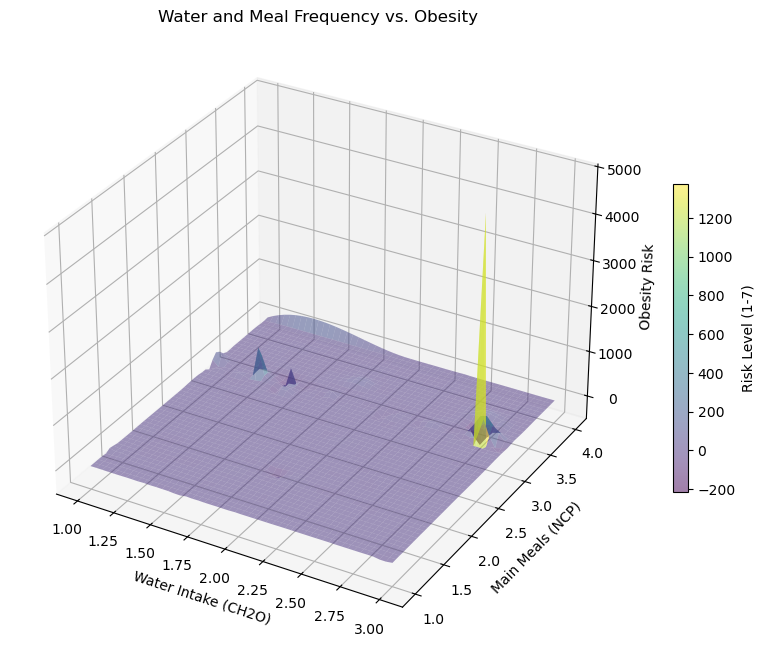

In [17]:
# Interpolate obesity risk for surface
xi = np.linspace(data['CH2O'].min(), data['CH2O'].max(), 50)
yi = np.linspace(data['NCP'].min(), data['NCP'].max(), 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata(
    (data['CH2O'], data['NCP']),
    data['Obesity_Risk'],
    (xi, yi),
    method='cubic'
)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.5)

#Title and Labels
ax.set_xlabel('Water Intake (CH2O)')
ax.set_ylabel('Main Meals (NCP)')
ax.set_zlabel('Obesity Risk')
ax.set_title('Water and Meal Frequency vs. Obesity')
fig.colorbar(surf, shrink=0.5, label='Risk Level (1-7)')

# Save Visualization
plt.savefig("Jamie_WaterMealFrequencyVSObesity.png")
plt.show()

## Purpose and Insight
The purpose of this 3D surface plot is to explore the relationship between dietary habits (consumption of water and meals) and obesity risk. This visualization focuses on the question of "How does water intake and meal frequency influence obesity risk?" From the visualization we can see that there is a large spike of increased obesity rates when water intake is greater than 2.50 and meals eaten is greater than 3. We can also see a smaller spike in obesity levels where water consumption is less than 1.75 and meals eaten is greater than 3. The big takeway from this visualization is that obesity risk gets higher with a lower consumption of water and more meal consumption. 